# aggregate and annotate htg mouse allelic series data

In [182]:
library(tidyr)
library(dplyr)

master_decoder_ring.xls says there should be 716 mice in total for all mrna measurements at all timepoints

In [135]:
df <- data.frame()

htg_dir <- "/proj/price1/CHDI/studies/allelic_series/HDinHD_FPKMs/"
setwd(htg_dir)


# loop though all dirs and append data to df
dirs_to_check <- c()
dirs_to_check <- append(dirs_to_check,list.files(pattern="*liver_mrnacounts"))
dirs_to_check <- append(dirs_to_check,list.files(pattern="*cortex_mrnacounts"))
dirs_to_check <- append(dirs_to_check,list.files(pattern="*striatum_mrnacounts"))
# dirs_to_check <- list.files(pattern="*mrnacounts")

input_type <- "*rawcounts.xls"
for (somedir in dirs_to_check) {
    print(somedir)
    
    # find the xls file and read in data
    myfile <- list.files(path=somedir, pattern="*rawcounts.xls")
    print(myfile)

    data <- read.delim(file.path(somedir,myfile), header=TRUE, sep="\t")
    gene_names <- data$genename
    cols_to_strip <- colnames(data)[1:3]
    
    # check to make sure we're concatenating on consistent gene ids
    if(exists('old_gene_names')){
        print(all.equal(gene_names,old_gene_names))
    } else {
        print(all.equal(gene_names,gene_names))
    }
    
    # check to make sure we're stipping out the right columns, and not samples
    print(all.equal(colnames(data)[1:3],c('genename', 'Entrez', 'description')))
    
    # get the data in rows = samples, cols = genes format
    transposed_data <- t(data[-c(1:3)])
    colnames(transposed_data) <- data[,1]
    
    # row names are a bad place to store important info -- make a column
    transposed_data <- cbind(Sample.ID=rownames(transposed_data),transposed_data)
    rownames(transposed_data) <- NULL
    print(dim(transposed_data))
    
    # append data to master dataframe
    df <- rbind(df,transposed_data)
    
    # for comparison above
    old_gene_names <- gene_names

}

[1] "10m_liver_mrnacounts"
[1] "liver_10m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    55 23352
[1] "2m_liver_mrnacounts"
[1] "liver_2m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "6m_liver_mrnacounts"
[1] "liver_6m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "10m_cortex_mrnacounts"
[1] "cortex_10m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "2m_cortex_mrnacounts"
[1] "cortex_2m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "6m_cortex_mrnacounts"
[1] "cortex_6m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "10m_striatum_mrnacounts"
[1] "striatum_10m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "2m_striatum_mrnacounts"
[1] "striatum_2m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    56 23352
[1] "6m_striatum_mrnacounts"
[1] "striatum_6m_rawcounts.xls"
[1] TRUE
[1] TRUE
[1]    96 23352


In [136]:
print(dim(df))
length(unique(df$Sample.ID))

[1]   543 23352


[1] 543

In [167]:
head(df[,1:10],10)

,Sample.ID,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik
1,X300195_Q20B0009_08_L1.D707,4659,17,2092,266,0,504,836,6,962
2,X300196_Q20B0013_05_L1.D708,5178,47,4415,347,0,417,868,19,1082
3,X300197_Q20B0009_03_L1.D709,4643,17,2738,257,0,444,732,12,861
4,X300198_Q92B0005_05_L1.D710,5350,54,4314,250,1,416,839,15,1182
5,X300199_Q140B0001_08_L1.D711,5309,51,3358,215,0,685,902,5,1205
6,X300200_Q92B0006_05_L29,4019,40,3462,167,2,481,728,19,1089
7,X300201_Q111B0009_06_L1.D702,3614,24,2414,206,0,462,600,2,857
8,X300202_Q80B0005_02_L11,3666,37,3306,144,0,406,795,9,977
9,X300203_Q140B0001_06_L1.D704,5202,29,3507,208,0,664,909,3,1130
10,X300204_Q20B0009_02_L1.D705,4256,29,2601,218,0,479,798,8,982


In [150]:
decoder_df <- read.delim("master_decoder_ring.csv", header=TRUE, sep=",")
decoder_df_mrna <- decoder_df[decoder_df$Seq.Type == "mRNA",]
decoder_df_mrna <- decoder_df_mrna[decoder_df_mrna$Tissue %in% c('liver','cortex','striatum'),]
print(dim(decoder_df_mrna))
head(decoder_df_mrna[order(decoder_df_mrna$observationid),])

[1] 543  10


,PGI.Mouse.ID,observationid,Tissue,Seq.Type,GenoType,Housing.Conditions,Numeric.Q,Sex,Genotyped.CAG,Month
874,Q175B0574.07,X20914_1_449L_striatum_Q175_WT_M_L1.LB1,striatum,mRNA,WT,Housed with Q175 and WT animals,175,MALE,NA,6
733,Q175B0574.06,X20921_1_450L_cortex_Q175_HET_M_L2.,cortex,mRNA,HET (Q175),Housed with Q175 and WT animals,175,MALE,207.082,6
881,Q175B0574.06,X20927_1_450L_striatum_Q175_HET_M_L1.LB2,striatum,mRNA,HET (Q175),Housed with Q175 and WT animals,175,MALE,207.082,6
875,Q175B0574.09,X20940_1_451L_striatum_Q175_WT_M_L6.LB3,striatum,mRNA,WT,Housed with Q175 and WT animals,175,MALE,NA,6
734,Q175B0574.10,X20947_1_452L_cortex_Q175_HET_M_L8.LB2,cortex,mRNA,HET (Q175),Housed with Q175 and WT animals,175,MALE,209.069,6
478,Q175B0574.10,X20953_1_452L_striatum_Q175_HET_M_L8.LB4,striatum,mRNA,HET (Q175),Housed with Q175 and WT animals,175,MALE,209.069,6


In [164]:
# create a map from row in our df to row in decoder_df_mrna

N <- length(df$Sample.ID)
map <- rep(NA,N)

for (i in 1:N){
    samp_id <- df$Sample.ID[i]
    long_X_string <- strsplit(as.character(samp_id),'_')
    X_string <- long_X_string[[1]][1]
    row_in_decoder_df <- grep(X_string,decoder_df_mrna$observationid)
    if(length(row_in_decoder_df) > 0) {
        map[i] <- row_in_decoder_df
    }
}

length(map)
sum(!is.na(map))
length(unique(map))

[1] 543

[1] 543

[1] 543

In [172]:
reordered_decoder_df_mrna <- decoder_df_mrna[map,]

In [173]:
head(reordered_decoder_df_mrna,10)

,PGI.Mouse.ID,observationid,Tissue,Seq.Type,GenoType,Housing.Conditions,Numeric.Q,Sex,Genotyped.CAG,Month
645,Q20B0009.08,X300195_Q20B0009_08_L1.D707,liver,mRNA,HET (Q20),Housed with Q20 and WT animals,20,MALE,19.9738,10
384,Q20B0013.05,X300196_Q20B0013_05_L1.D708,liver,mRNA,WT,Housed with Q20 and WT animals,20,FEMALE,7,10
656,Q20B0009.03,X300197_Q20B0009_03_L1.D709,liver,mRNA,WT,Housed with Q20 and WT animals,20,MALE,7,10
657,Q92B0005.05,X300198_Q92B0005_05_L1.D710,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,102.467,10
658,Q140B0001.08,X300199_Q140B0001_08_L1.D711,liver,mRNA,HET (Q140),Housed with Q140 and WT animals,140,MALE,148.267,10
659,Q92B0006.05,X300200_Q92B0006_05_L29,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,101.695,10
660,Q111B0009.06,X300201_Q111B0009_06_L1.D702,liver,mRNA,HET (Q111),Housed with Q111 and WT animals,111,MALE,125.096,10
661,Q80B0005.02,X300202_Q80B0005_02_L11,liver,mRNA,HET (Q80),Housed with Q80 and WT animals,80,FEMALE,88.5356,10
662,Q140B0001.06,X300203_Q140B0001_06_L1.D704,liver,mRNA,HET (Q140),Housed with Q140 and WT animals,140,MALE,145.227,10
476,Q20B0009.02,X300204_Q20B0009_02_L1.D705,liver,mRNA,HET (Q20),Housed with Q20 and WT animals,20,MALE,20.012,10


In [174]:
annotated_df <- cbind(reordered_decoder_df_mrna, df)

In [177]:
head(annotated_df[1:20])

,PGI.Mouse.ID,observationid,Tissue,Seq.Type,GenoType,Housing.Conditions,Numeric.Q,Sex,Genotyped.CAG,Month,Sample.ID,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik
645,Q20B0009.08,X300195_Q20B0009_08_L1.D707,liver,mRNA,HET (Q20),Housed with Q20 and WT animals,20,MALE,19.9738,10,X300195_Q20B0009_08_L1.D707,4659,17,2092,266,0,504,836,6,962
384,Q20B0013.05,X300196_Q20B0013_05_L1.D708,liver,mRNA,WT,Housed with Q20 and WT animals,20,FEMALE,7,10,X300196_Q20B0013_05_L1.D708,5178,47,4415,347,0,417,868,19,1082
656,Q20B0009.03,X300197_Q20B0009_03_L1.D709,liver,mRNA,WT,Housed with Q20 and WT animals,20,MALE,7,10,X300197_Q20B0009_03_L1.D709,4643,17,2738,257,0,444,732,12,861
657,Q92B0005.05,X300198_Q92B0005_05_L1.D710,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,102.467,10,X300198_Q92B0005_05_L1.D710,5350,54,4314,250,1,416,839,15,1182
658,Q140B0001.08,X300199_Q140B0001_08_L1.D711,liver,mRNA,HET (Q140),Housed with Q140 and WT animals,140,MALE,148.267,10,X300199_Q140B0001_08_L1.D711,5309,51,3358,215,0,685,902,5,1205
659,Q92B0006.05,X300200_Q92B0006_05_L29,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,101.695,10,X300200_Q92B0006_05_L29,4019,40,3462,167,2,481,728,19,1089


In [187]:
all_mrna_data_tidy <- gather(annotated_df, Gene, Expression,
                             -PGI.Mouse.ID,
                             -observationid,
                             -Tissue,
                             -Seq.Type,
                             -GenoType,
                             -Genotyped.CAG,
                             -Housing.Conditions,
                             -Numeric.Q,
                             -Sex,
                             -Genotyped.CAG,
                             -Month,
                             -Sample.ID
                            )

Warning message:
: attributes are not identical across measure variables; they will be dropped

In [200]:
dim(all_mrna_data_tidy)
head(all_mrna_data_tidy)

[1] 12679593       13

,PGI.Mouse.ID,observationid,Tissue,Seq.Type,GenoType,Housing.Conditions,Numeric.Q,Sex,Genotyped.CAG,Month,Sample.ID,Gene,Expression
1,Q20B0009.08,X300195_Q20B0009_08_L1.D707,liver,mRNA,HET (Q20),Housed with Q20 and WT animals,20,MALE,19.9738,10,X300195_Q20B0009_08_L1.D707,0610005C13Rik,4659
2,Q20B0013.05,X300196_Q20B0013_05_L1.D708,liver,mRNA,WT,Housed with Q20 and WT animals,20,FEMALE,7,10,X300196_Q20B0013_05_L1.D708,0610005C13Rik,5178
3,Q20B0009.03,X300197_Q20B0009_03_L1.D709,liver,mRNA,WT,Housed with Q20 and WT animals,20,MALE,7,10,X300197_Q20B0009_03_L1.D709,0610005C13Rik,4643
4,Q92B0005.05,X300198_Q92B0005_05_L1.D710,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,102.467,10,X300198_Q92B0005_05_L1.D710,0610005C13Rik,5350
5,Q140B0001.08,X300199_Q140B0001_08_L1.D711,liver,mRNA,HET (Q140),Housed with Q140 and WT animals,140,MALE,148.267,10,X300199_Q140B0001_08_L1.D711,0610005C13Rik,5309
6,Q92B0006.05,X300200_Q92B0006_05_L29,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,101.695,10,X300200_Q92B0006_05_L29,0610005C13Rik,4019


In [199]:
dim(df)
length(unique(all_mrna_data_tidy$Gene))

[1]   543 23352

[1] 23351

In [202]:
# save data -- names persist so pick the right ones of rthe normalization

all_mrna_data_raw <- annotated_df
all_mrna_data_raw_tidy <- all_mrna_data_tidy

save(all_mrna_data_raw,file="all_mrna_data_RAW.Rdata")
save(all_mrna_data_raw_tidy,file="all_mrna_data_tidy_RAW.Rdata")

## create nonparanormally normalized data

In [209]:
if (!require(huge)) {
    install.packages('huge', repos='http://cran.us.r-project.org')
    require(huge)
}

In [221]:
head(all_mrna_data_raw[,11:20])

,Sample.ID,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik
645,X300195_Q20B0009_08_L1.D707,4659,17,2092,266,0,504,836,6,962
384,X300196_Q20B0013_05_L1.D708,5178,47,4415,347,0,417,868,19,1082
656,X300197_Q20B0009_03_L1.D709,4643,17,2738,257,0,444,732,12,861
657,X300198_Q92B0005_05_L1.D710,5350,54,4314,250,1,416,839,15,1182
658,X300199_Q140B0001_08_L1.D711,5309,51,3358,215,0,685,902,5,1205
659,X300200_Q92B0006_05_L29,4019,40,3462,167,2,481,728,19,1089


In [229]:
all_mrna_data_raw_just_gnxp <- all_mrna_data_raw[,-c(1:11)]
dim(all_mrna_data_raw_just_gnxp)

[1]   543 23351

In [226]:
X <- all_mrna_data_raw_just_gnxp

In [227]:
X_npn <- huge.npn(X)

Conducting the nonparanormal (npn) transformation via shrunkun ECDF....done.


In [228]:
str(X_npn)

 num [1:543, 1:23351] 0.831 1.047 0.818 1.139 1.121 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:543] "645" "384" "656" "657" ...
  ..$ : chr [1:23351] "0610005C13Rik" "0610007N19Rik" "0610007P14Rik" "0610008F07Rik" ...


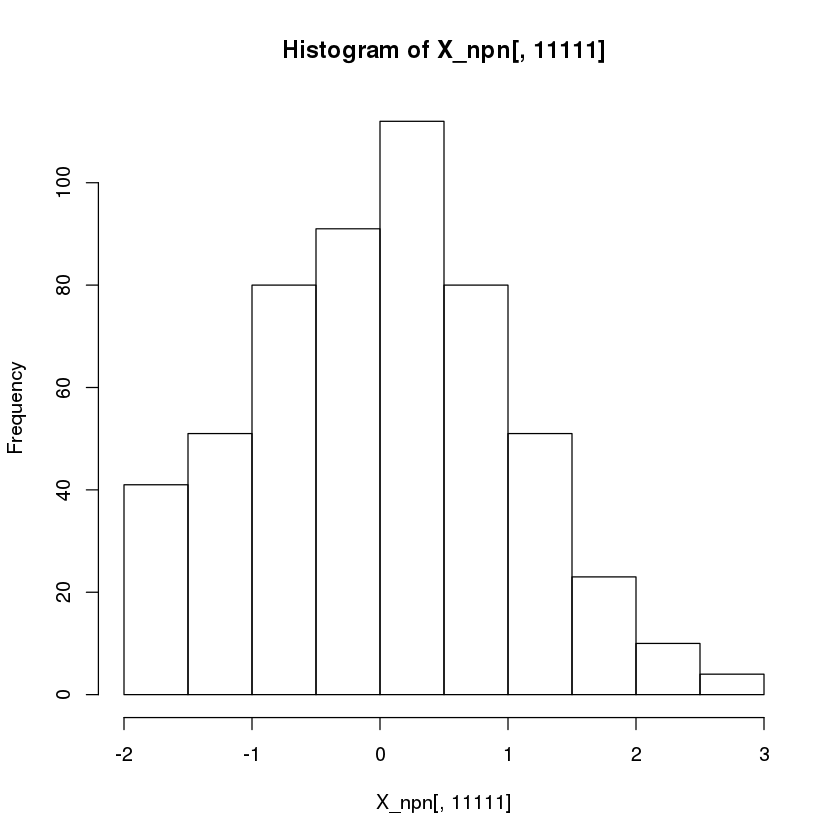

In [233]:
hist(X_npn[,11111])

In [234]:
all_mrna_data_npn <- all_mrna_data_raw
all_mrna_data_npn[,-c(1:11)] <- X_npn

In [237]:
head(all_mrna_data_npn[1:20])

,PGI.Mouse.ID,observationid,Tissue,Seq.Type,GenoType,Housing.Conditions,Numeric.Q,Sex,Genotyped.CAG,Month,Sample.ID,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik
645,Q20B0009.08,X300195_Q20B0009_08_L1.D707,liver,mRNA,HET (Q20),Housed with Q20 and WT animals,20,MALE,19.9738,10,X300195_Q20B0009_08_L1.D707,0.8314238323527,-2.4469175947943,0,1.39185350876437,-0.736644663299125,0.633508441116424,0.454425299207515,-0.120238212362989,1.75065610830383
384,Q20B0013.05,X300196_Q20B0013_05_L1.D708,liver,mRNA,WT,Housed with Q20 and WT animals,20,FEMALE,7,10,X300196_Q20B0013_05_L1.D708,1.04695072634965,-0.377734864681174,0.694543879329425,1.98835370732709,-0.736644663299125,-0.4990206716927,0.602432188258295,-0.627815233923194,-1.03115854448162
656,Q20B0009.03,X300197_Q20B0009_03_L1.D709,liver,mRNA,WT,Housed with Q20 and WT animals,20,MALE,7,10,X300197_Q20B0009_03_L1.D709,0.818383542227749,-2.4469175947943,0.208430069625774,1.31809486564066,-0.736644663299125,-0.11076908136686,0.129717697884562,-1.07112013387049,1.28626336425786
657,Q92B0005.05,X300198_Q92B0005_05_L1.D710,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,102.467,10,X300198_Q92B0005_05_L1.D710,1.13871370377917,0.091858546935898,0.682731914546304,1.26571831259776,0.360158488348969,-0.514985854312407,0.475298220383548,-0.773753167076281,-0.477921179201813
658,Q140B0001.08,X300199_Q140B0001_08_L1.D711,liver,mRNA,HET (Q140),Housed with Q140 and WT animals,140,MALE,148.267,10,X300199_Q140B0001_08_L1.D711,1.12135361499196,-0.0871360863922832,0.454425299207515,1.03902356084791,-0.736644663299125,1.86315763730484,0.815144306719347,-0.390358012211434,-0.367677851080438
659,Q92B0006.05,X300200_Q92B0006_05_L29,liver,mRNA,HET (Q92),Housed with Q92 and WT animals,92,FEMALE,101.695,10,X300200_Q92B0006_05_L29,0.596842270823333,-0.786350866409705,0.477921179201813,0.673932615336486,1.12135361499196,0.337715309339834,0.108403318476968,-0.627815233923194,-0.977729440243976


In [238]:
all_mrna_data_npn_tidy <- gather(all_mrna_data_npn, Gene, Expression,
                             -PGI.Mouse.ID,
                             -observationid,
                             -Tissue,
                             -Seq.Type,
                             -GenoType,
                             -Genotyped.CAG,
                             -Housing.Conditions,
                             -Numeric.Q,
                             -Sex,
                             -Genotyped.CAG,
                             -Month,
                             -Sample.ID
                            )

In [239]:
dim(all_mrna_data_npn_tidy)

[1] 12679593       13

In [240]:
dim(all_mrna_data_raw_tidy)

[1] 12679593       13

In [241]:
save(all_mrna_data_npn,file="all_mrna_data_NPN.Rdata")
save(all_mrna_data_npn_tidy,file="all_mrna_data_tidy_NPN.Rdata")